## Step 1: Data cleaning and formatting

In [1]:
# data exploration and visualization

import pandas as pd 
import numpy as np 

import os
import matplotlib.pyplot as plt
%matplotlib inline 
 
plt.rcParams["font.size"]=24

import seaborn as sns

sns.set(font_scale=2)

from IPython.core.pylabtools import figsize


# for saving the all the images we creat in this program

root_dir = "."
project_id = "Car_Price"
image_path = os.path.join(root_dir,"images",project_id)

def save_fig(fig_id, tight_layout=True, extension="png", dim=300):
    os.makedirs(image_path,exist_ok=True)
    fig_path = os.path.join(image_path,fig_id+"."+extension)
    print("saving ...."+fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(fig_id, format=extension, dpi=dim)
        
#Ignore all the warnings        
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read in train and test data into a dataframe 

data = pd.read_csv("train-data.csv")

#checking the size of the train

print(data.shape)

(6019, 13)


In [3]:
#data = train.iloc[0:1000]

In [4]:
data.shape

(6019, 13)

In [5]:
# display the content of the train data
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
#give the details information of the train data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [7]:
#Missing value findind functions
def mis_val(df):
    mis_val_sum = df.isnull().sum()
    percent_mis = mis_val_sum * 100 / len(df)
    table = pd.concat([mis_val_sum,percent_mis], axis=1)
    table = table.rename(columns={0:"missing values", 1:"percent of missing value"})
    table = table[table["missing values"]!=0].sort_values("percent of missing value", ascending =False).round(1)
    print("dataframe has", df.shape[1],"columns.\n", table.shape[0],"have missing values")
    return table

In [8]:
#Calling a function which calculates the missing values
table_train = mis_val(data)

# Dispalying the missing values along with its percentages
table_train

dataframe has 13 columns.
 5 have missing values


,missing values,percent of missing value
New_Price,5195,86.3
Seats,42,0.7
Engine,36,0.6
Power,36,0.6
Mileage,2,0.0


# Step:2-Exploratory Data Analysis

In [9]:
#checking all the numerical colums present in the dataframe

numerical_features = [features for features in data.columns if data[features].dtypes != 'O']
print("Number of numeric variables: ",len(numerical_features))
data[numerical_features].head()

Number of numeric variables:  4


,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


['Year']


Text(0.5, 1.0, 'Car Price vs Model_Year')

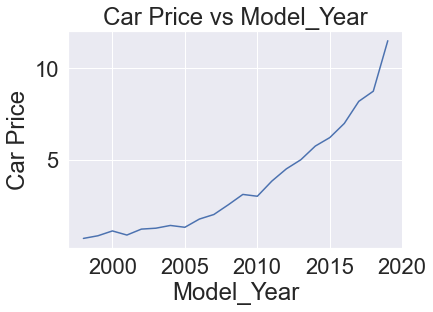

In [10]:
#checking the columns which contains year information to predict their impacts
year_features = [features for features in numerical_features if 'Yr' in features or 'Year' in features]
print(year_features)
data.groupby('Year')['Price'].median().plot()
plt.xlabel('Model_Year')
plt.ylabel('Car Price')
plt.title('Car Price vs Model_Year')

In [11]:
data['brand_name'] = data['Name'].apply(lambda x: str(x).split(" ")[0])
data['Mileage(km/kg)'] = data['Mileage'].apply(lambda x: str(x).split(" ")[0])
data['Engine(CC)'] = data['Engine'].apply(lambda x: str(x).split(" ")[0])
data['Power(bhp)'] = data['Power'].apply(lambda x: str(x).split(" ")[0])
data.drop(columns=["Name"], axis=1, inplace=True)
data.drop(columns=["Mileage"], axis=1, inplace=True)
data.drop(columns=["Engine"], axis=1, inplace=True)
data.drop(columns=["Power"], axis=1, inplace=True)

In [12]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'New_Price', 'Price', 'brand_name',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)'],
      dtype='object')

In [13]:
data.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,brand_name,Mileage(km/kg),Engine(CC),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,Maruti,26.6,998,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,Hyundai,19.67,1582,126.2
2,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,Honda,18.2,1199,88.7
3,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,Maruti,20.77,1248,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,Audi,15.2,1968,140.8


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Seats              5977 non-null   float64
 7   New_Price          824 non-null    object 
 8   Price              6019 non-null   float64
 9   brand_name         6019 non-null   object 
 10  Mileage(km/kg)     6019 non-null   object 
 11  Engine(CC)         6019 non-null   object 
 12  Power(bhp)         6019 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [15]:
data['Power(bhp)'][79]

'null'

In [16]:
x = 'n'
count = 0
position = []
for i in range(data.shape[0]):
    if data['Power(bhp)'][i]=='null':
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
107
[76, 79, 89, 120, 143, 227, 245, 262, 307, 308, 386, 424, 428, 443, 472, 575, 631, 647, 648, 739, 748, 829, 915, 926, 934, 1068, 1143, 1153, 1271, 1319, 1345, 1388, 1419, 1555, 1578, 1649, 1672, 1857, 1999, 2053, 2130, 2164, 2262, 2267, 2305, 2343, 2369, 2393, 2441, 2450, 2497, 2501, 2527, 2579, 2597, 2635, 2640, 2891, 3033, 3061, 3104, 3189, 3247, 3290, 3439, 3516, 3533, 3589, 3628, 3638, 3645, 3669, 3733, 3800, 3882, 3898, 3930, 3999, 4077, 4080, 4351, 4354, 4629, 4709, 4714, 4744, 4830, 4886, 4900, 4954, 5065, 5119, 5228, 5426, 5438, 5458, 5529, 5533, 5647, 5755, 5759, 5861, 5873, 5893, 5925, 5943, 5985]


In [17]:
train_data = data.drop(data.index[position])
train_data = train_data.reset_index(drop=True)

In [18]:
train_data.shape

(5912, 13)

In [19]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5912 non-null   object 
 1   Year               5912 non-null   int64  
 2   Kilometers_Driven  5912 non-null   int64  
 3   Fuel_Type          5912 non-null   object 
 4   Transmission       5912 non-null   object 
 5   Owner_Type         5912 non-null   object 
 6   Seats              5874 non-null   float64
 7   New_Price          824 non-null    object 
 8   Price              5912 non-null   float64
 9   brand_name         5912 non-null   object 
 10  Mileage(km/kg)     5910 non-null   float64
 11  Engine(CC)         5876 non-null   float64
 12  Power(bhp)         5876 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 600.6+ KB


In [21]:
data1 = train_data.drop('New_Price',axis=1)

In [22]:
data1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,brand_name,Mileage(km/kg),Engine(CC),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80


In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5912 non-null   object 
 1   Year               5912 non-null   int64  
 2   Kilometers_Driven  5912 non-null   int64  
 3   Fuel_Type          5912 non-null   object 
 4   Transmission       5912 non-null   object 
 5   Owner_Type         5912 non-null   object 
 6   Seats              5874 non-null   float64
 7   Price              5912 non-null   float64
 8   brand_name         5912 non-null   object 
 9   Mileage(km/kg)     5910 non-null   float64
 10  Engine(CC)         5876 non-null   float64
 11  Power(bhp)         5876 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 554.4+ KB


In [24]:
train_data['Seats'].isnull().sum()

38

In [25]:
train_data['Mileage(km/kg)'].isnull().sum()

2

In [26]:
train_data['Engine(CC)'].isnull().sum()

36

In [27]:
train_data['Seats'].fillna(train_data['Seats'].mean(), inplace=True)
train_data['Mileage(km/kg)'].fillna(train_data['Mileage(km/kg)'].mean(), inplace=True)
train_data['Engine(CC)'].fillna(train_data['Engine(CC)'].mean(), inplace=True)

In [28]:
train_data['Seats'].isnull().sum()

0

In [29]:
train_data.isnull().sum().sum()

5124

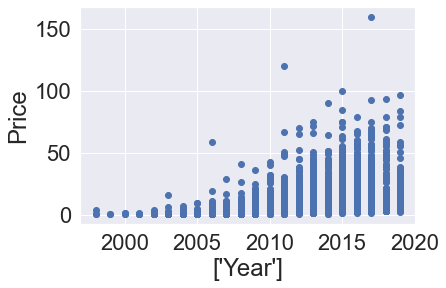

In [30]:
# We can also use scatter plot to check the SPrice based on the columns which is based on the year
plt.scatter(train_data['Year'],train_data['Price'])
plt.xlabel(year_features)
plt.ylabel('Price')
plt.show()

In [31]:
discrete_features = [features for features in numerical_features if len(train_data[features].unique())<25 and features not in year_features+['Id']]
print("Discrete Varibales Count: {}".format(len(discrete_features)))

Discrete Varibales Count: 1


In [32]:
# Now we will look for the continous data in the dataframe and display the continous data
continous_feature = [features for features in numerical_features if features not in discrete_features]
print("Continous feature count {}".format(len(continous_feature)))

Continous feature count 3


In [33]:
#displaying the continous data
print(continous_feature)

['Year', 'Kilometers_Driven', 'Price']


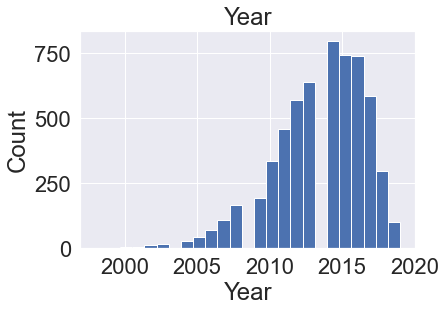

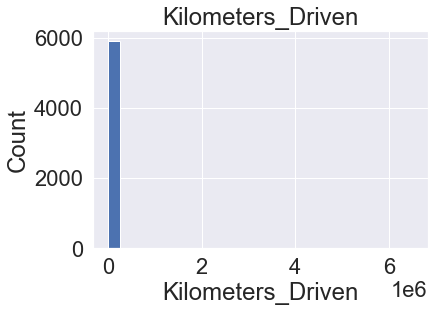

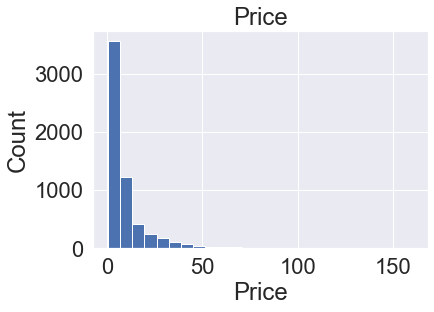

In [34]:
#displaying the histogram plot of the continous data

for features in continous_feature:
    data1 = train_data.copy()
    data1[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

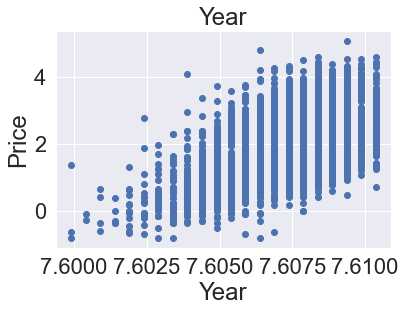

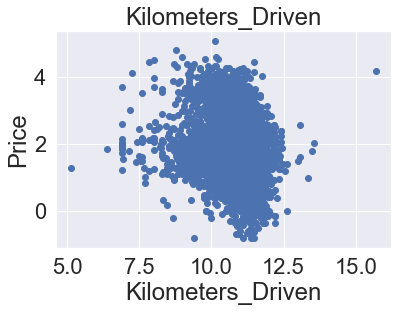

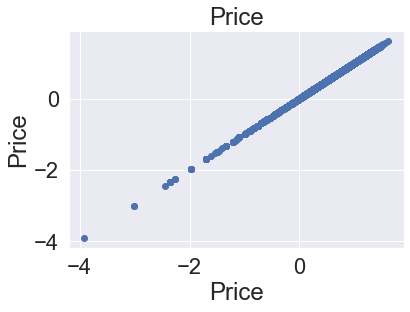

In [35]:
# We can see and analyze the data using scatter plot for the continous data.
for features in continous_feature:
    data1 = train_data.copy()
    if 0 in data1[features].unique():
        pass
    else:
        data1[features] = np.log(data1[features])
        data1['Price'] = np .log(data1['Price'])
        plt.scatter(data1[features],data1['Price'])
        plt.xlabel(features)
        plt.ylabel('Price')
        plt.title(features)
        plt.show()

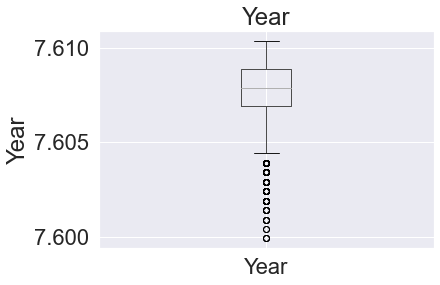

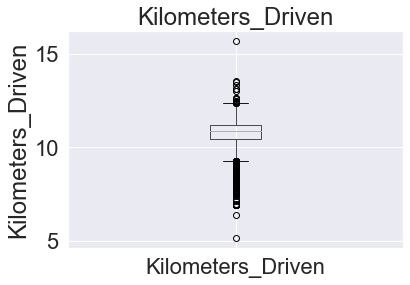

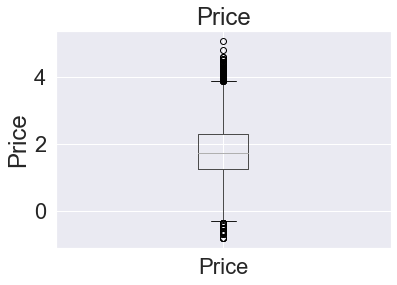

In [36]:
# We can see plot the boxplot to see the outliers in the continous features of the dataset
for features in continous_feature:
    data1 = train_data.copy()
    if 0 in data1[features].unique():
        pass
    else:
        data1[features] = np.log(data1[features])
        data1.boxplot(column=features)
        plt.ylabel(features)
        plt.title(features)
        plt.show()

In [37]:
#categorical variables:
categorical_features = [features for features in train_data.columns if data1[features].dtypes == 'O']

In [38]:
print(categorical_features)

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'New_Price', 'brand_name']


In [39]:
train_data[categorical_features].head()

,Location,Fuel_Type,Transmission,Owner_Type,New_Price,brand_name
0,Mumbai,CNG,Manual,First,NaN,Maruti
1,Pune,Diesel,Manual,First,NaN,Hyundai
2,Chennai,Petrol,Manual,First,8.61 Lakh,Honda
3,Chennai,Diesel,Manual,First,NaN,Maruti
4,Coimbatore,Diesel,Automatic,Second,NaN,Audi


In [40]:
# checking the unique value in each of the columns of the categorical variables
for features in categorical_features:
    print("The feature is {} and the number of categories are {}".format(features,len(train_data[features].unique())))
    print("...............................................")

The feature is Location and the number of categories are 11
...............................................
The feature is Fuel_Type and the number of categories are 5
...............................................
The feature is Transmission and the number of categories are 2
...............................................
The feature is Owner_Type and the number of categories are 4
...............................................
The feature is New_Price and the number of categories are 541
...............................................
The feature is brand_name and the number of categories are 30
...............................................


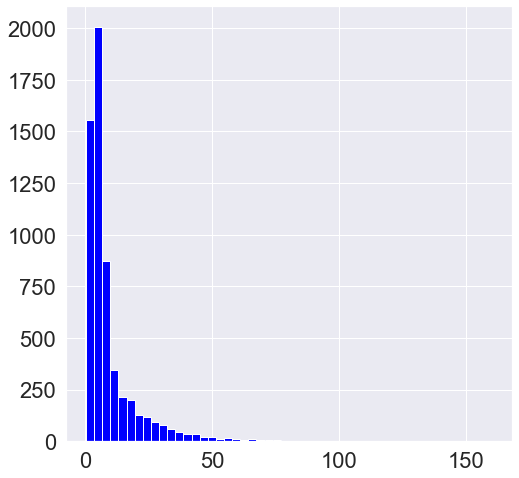

In [41]:
figsize(8,8)

plt.hist(train_data["Price"], bins =50, color="blue")
plt.show()

In [42]:
train_data["Location"].describe()

count       5912
unique        11
top       Mumbai
freq         780
Name: Location, dtype: object

In [43]:
# checking the sales type colums and plotting the diagram which contains more than 5.
state = train_data["Location"].value_counts()
state = list(state[state.values>620].index)
state

['Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore']

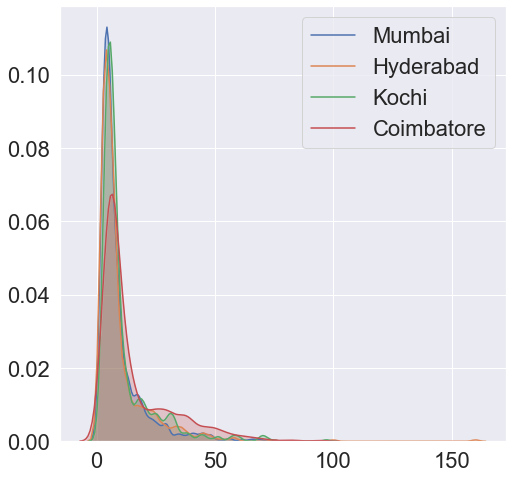

In [44]:
figsize(8,8)

for s in state:
    subset = train_data[train_data["Location"]==s]
    sns.kdeplot(subset["Price"].dropna(), shade= True, label=s)

In [45]:
train_data["Fuel_Type"].describe()

count       5912
unique         5
top       Diesel
freq        3161
Name: Fuel_Type, dtype: object

In [46]:
# checking the sales type colums and plotting the diagram which contains more than 5.
city = train_data["Fuel_Type"].value_counts()
city = list(city[city.values>15].index)
city

['Diesel', 'Petrol', 'CNG']

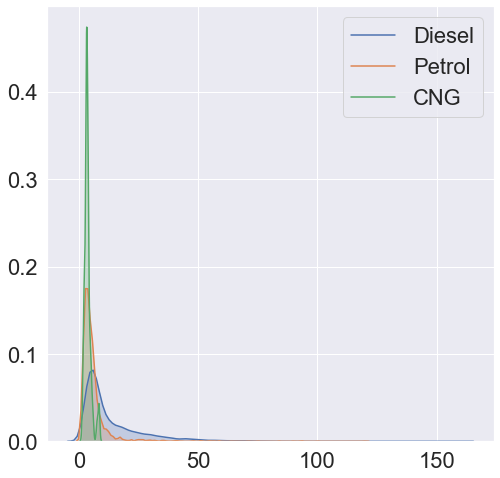

In [47]:
figsize(8,8)

for s in city:
    subset = train_data[train_data["Fuel_Type"]==s]
    sns.kdeplot(subset["Price"].dropna(), shade= True, label=s)

In [48]:
correlations = train_data.corr()
correlations["Price"].sort_values(ascending=False)

Price                1.000000
Power(bhp)           0.772566
Engine(CC)           0.656281
Year                 0.298722
Seats                0.055400
Kilometers_Driven   -0.008507
Mileage(km/kg)      -0.333080
Name: Price, dtype: float64

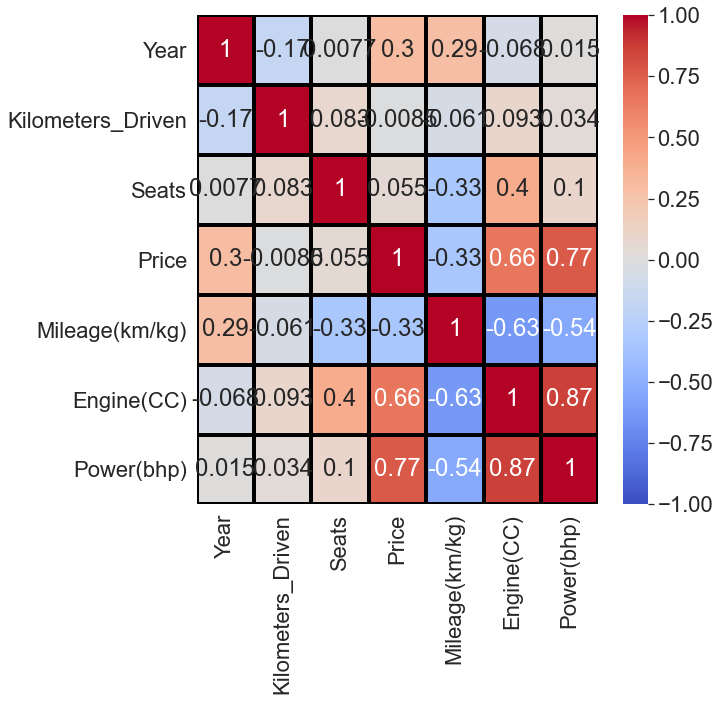

In [49]:
figsize(9,9)

correlations = train_data.corr()
sns.heatmap(correlations, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

plt.show()

## Step3: Feature Selection and Engineering

In [50]:
def corr_fun(df):
    df.dropna()
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "Price":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
    cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand_name']
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    corr_ = features.corr()["Price"].sort_values(ascending=False)
    return corr_        

In [51]:
correlations = corr_fun(train_data)

In [52]:
correlations.head(15)

Price                       1.000000
Power(bhp)                  0.772566
sqrt_Power(bhp)             0.750980
log_Power(bhp)              0.711269
Engine(CC)                  0.656281
sqrt_Engine(CC)             0.642362
log_Engine(CC)              0.617189
Transmission_Automatic      0.585677
brand_name_Mercedes-Benz    0.366683
Fuel_Type_Diesel            0.322147
brand_name_BMW              0.303166
Year                        0.298722
sqrt_Year                   0.298681
log_Year                    0.298640
brand_name_Audi             0.289533
Name: Price, dtype: float64

In [53]:
correlations.tail(15)

brand_name_Chevrolet     -0.083646
Location_Jaipur          -0.088960
brand_name_Volkswagen    -0.090202
brand_name_Tata          -0.095138
Location_Kolkata         -0.107027
brand_name_Honda         -0.125873
sqrt_Kilometers_Driven   -0.149429
brand_name_Hyundai       -0.170812
log_Kilometers_Driven    -0.179376
brand_name_Maruti        -0.225015
Fuel_Type_Petrol         -0.310768
sqrt_Mileage(km/kg)      -0.315067
Mileage(km/kg)           -0.333080
log_Mileage(km/kg)       -0.356058
Transmission_Manual      -0.585677
Name: Price, dtype: float64

In [54]:
# Creating the Dummies of the categoical datas. this listed data has more impact on the target.
def create_new_data(df):
    numeric = df.select_dtypes("number")
    num_cols = list(numeric.columns)
    for col in num_cols:
        if col == "Price":
            continue
        else:
            numeric["sqrt_"+col] = np.sqrt(numeric[col])
            numeric["log_"+col] = np.log(numeric[col])
            
    cat_cols = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand_name']
    dummies = pd.get_dummies(df[cat_cols])
    features = pd.concat([numeric,dummies], axis=1)
    return features 

In [55]:
train_new = create_new_data(train_data)

In [56]:
print(train_new.shape)

(5912, 71)


In [57]:
train_new.isnull().sum().sum()

108

In [58]:
# train_new=train_new.dropna(0)

In [59]:
# train_new.isnull().sum().sum()

In [60]:
def clean_dataset(df):
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [61]:
train_new = clean_dataset(train_new)

In [62]:
train_new['Seats'].fillna(train_new['Seats'].mean(), inplace=True)

In [63]:
# Collinear removing Function
def remove_colinear(x,  threshold):
    y = x["Price"]
    x = x.drop("Price",1)
    cor_ = x.corr()
    drop_cols = []
    cols = list(cor_.columns)
    cols = range(len(cols)-1)
    for i in list(cols):
        for j in range(i):
            item = cor_.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
    drops = set(drop_cols)
    x = x.drop(columns = drops, axis=1)
    x["Price"]=y
    return x

In [64]:
# # Data after removing the collinerity
#train_new = remove_colinear(train_new,0.7)

In [65]:
print(train_new.shape)

(5847, 71)


In [67]:
data_new_new = train_new.copy()

In [68]:
data_new_new.shape

(5847, 71)

In [79]:
list_data=data_new_new.values.tolist()

In [80]:
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [81]:
calcShannonEnt(list_data)

0.03434009863476298

In [82]:
# splitting the data set
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = 1
    return bestFeature 

In [83]:
chooseBestFeatureToSplit(list_data)

1

In [217]:
train_new=train_new.drop(['Seats', 'Kilometers_Driven'], axis=1)

In [218]:
print(train_new.shape)

(5847, 69)


## Split Into Training and Testing Sets

In [219]:
no_score = train_new[train_new['Price'].isna()]
score = train_new[train_new['Price'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 69)
(5847, 69)


In [220]:
features = train_new.drop("Price", axis=1)
targets = train_new["Price"]

In [221]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(features,targets, test_size=0.3, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(4092, 68)
(1755, 68)
(4092,)
(1755,)


In [222]:
np.any(np.isnan(X))

False

In [223]:
np.all(np.isfinite(X))

True

In [224]:
np.any(np.isnan(X_test))

False

In [225]:
np.all(np.isfinite(X_test))

True

# Establishing a Baseline

In [226]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


baseline_guess = np.median(y)

print("The baseline guess is a score of", baseline_guess)
print("The baseline performance on the test set: root mean squared error =", rmse(y_test,baseline_guess))

The baseline guess is a score of 5.675
The baseline performance on the test set: root mean squared error = 12.42454413742381


# Step:4 Evaluating and Comparing Machine Learning Models

Imputing Missing Values

In [227]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(X,y)
X= imputer.transform(X)
X_test= imputer.transform(X_test)

In [228]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
# print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0


In [229]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


Scaling Feature

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
scaler.fit(X,y)

X = scaler.transform(X)
X_test = scaler.transform(X_test)


In [231]:
# Convert y and y_test to one-dimensional array (vector)
y = np.array(y).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

# Models to Evaluate

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

In [232]:
# Function to calculate root mean square error
from sklearn.metrics import r2_score

def rmse (y_true,y_pred):
    
    return np.sqrt(np.mean((y_true - y_pred)**2)),r2_score(y_pred, y_true)

In [233]:
# Takes in a model, trains the model, and evaluates the model on the test set
def model_test(model):
    model.fit(X,y)
    predictions = model.predict(X_test)
    model_rsme,model_r2 = rmse(y_test,predictions)
    return model_rsme,model_r2


In [234]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [235]:
lr = LinearRegression()

lr_rsme,lr_r2 = model_test(lr)

print(" the root mean squared error for linear regression is:", lr_rsme)
print(" the R-squared score for linear regression is:", lr_r2)

 the root mean squared error for linear regression is: 5.357049427695502
 the R-squared score for linear regression is: 0.7140898257929098


In [267]:
%%timeit -n 1 -r 5
lr.fit(X,y)

16.4 ms ± 7.55 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [236]:
knn = KNeighborsRegressor(n_neighbors=21)
knn_rsme,knn_r2 = model_test(knn)
print(" the root mean squared error for K nearest neighbors is:", knn_rsme)
print(" the R-squared score for K nearest neighbors is:", knn_r2)

 the root mean squared error for K nearest neighbors is: 6.026402858199878
 the R-squared score for K nearest neighbors is: 0.5435024610251049


In [268]:
%%timeit -n 1 -r 5
knn.fit(X,y)

102 ms ± 21 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [237]:
svm = SVR()
svm_rsme,svm_r2 = model_test(svm)
print(" the root mean squared error for Support vector machine is:", svm_rsme)
print(" the R-squared score for Support vector machine is:", svm_r2)

 the root mean squared error for Support vector machine is: 6.564190852783255
 the R-squared score for Support vector machine is: 0.1876334297337372


In [269]:
%%timeit -n 1 -r 5
svm.fit(X,y)

2.45 s ± 161 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [238]:
tree = DecisionTreeRegressor()
tree_rsme,tree_r2 = model_test(tree)
print(" the root mean squared error for decision tree is:", tree_rsme)
print(" the R-squared score for decision tree is:", tree_r2)

 the root mean squared error for decision tree is: 5.211277207000711
 the R-squared score for decision tree is: 0.7812533681002682


In [270]:
%%timeit -n 1 -r 5
tree.fit(X,y)

97.7 ms ± 7.53 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [248]:
from sklearn.ensemble import VotingRegressor

er = VotingRegressor([('lr', lr), ("tree",tree)])

er_rsme,er_R2 = model_test(er)
print(" the root mean log squared error for ensemble is:", er_rsme)
print(" the R2 score for ensemble is:", er_R2)

 the root mean log squared error for ensemble is: 4.706592171641594
 the R2 score for ensemble is: 0.7880273952739308


In [271]:
%%timeit -n 1 -r 5
er.fit(X,y)

96.8 ms ± 13.3 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


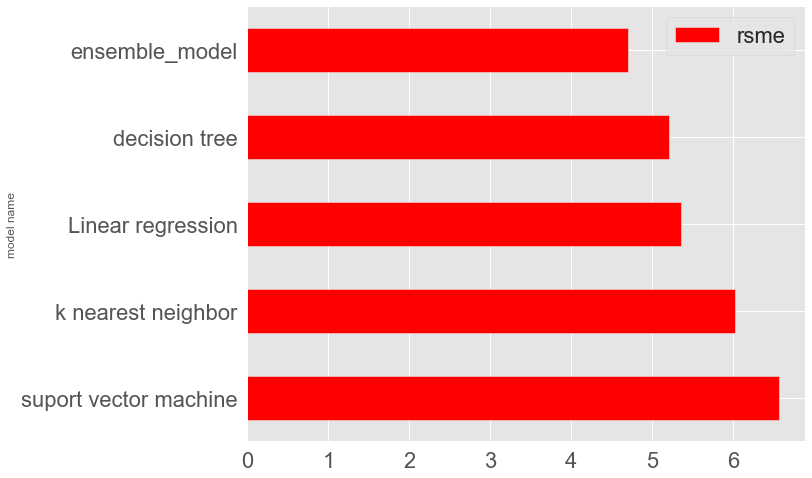

In [249]:
# Plotting in the graph of the rootmean square

figsize(10,8)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree","ensemble_model"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,er_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).plot(x="model name", y="rsme", color="red", kind="barh")

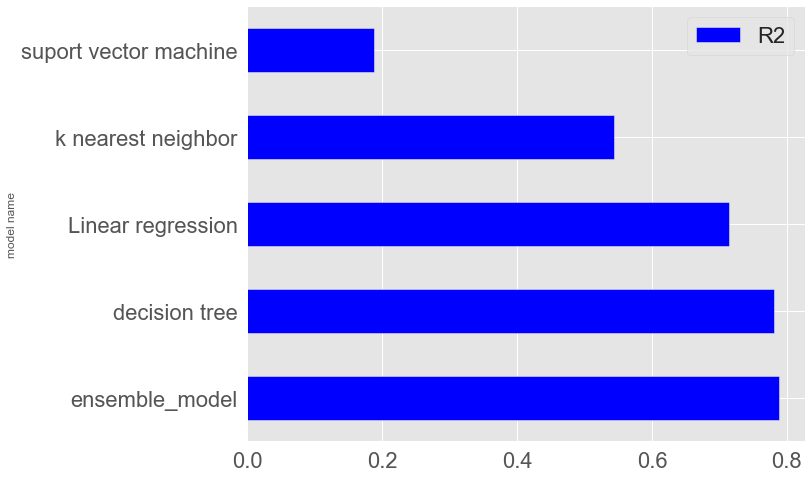

In [250]:
# Plotting in the graph of the rootmean square

figsize(10,8)

plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree","ensemble_model"],
                                "R2": [lr_r2,knn_r2,svm_r2,tree_r2,er_R2]})
model_comparison = model_comparison.sort_values("R2", ascending=False).plot(x="model name", y="R2", color="blue", kind="barh")

In [256]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense( 50, activation='relu',input_dim = X.shape[1]))

# Adding the second hidden layer
model.add(Dense(25,activation='relu'))

# Adding the third hidden layer
model.add(Dense(50,activation='relu'))
# Adding the output layer
model.add(Dense(1))

# Compiling the ANN
model.compile(loss='mean_squared_error', optimizer='Adamax')

#create monitor
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience=5, verbose=1, mode= "auto")

# Fitting the ANN to the Training set
model_history=model.fit(X,y, callbacks = [monitor], validation_split=0.10, batch_size = 50,nb_epoch = 500)

Train on 3682 samples, validate on 410 samples
Epoch 1/500
3682/3682 [==============================] - 1s 165us/sample - loss: 159.2726 - val_loss: 140.8723
Epoch 2/500
3682/3682 [==============================] - 0s 47us/sample - loss: 97.9873 - val_loss: 110.5522
Epoch 3/500
3682/3682 [==============================] - 0s 74us/sample - loss: 70.0753 - val_loss: 81.6825
Epoch 4/500
3682/3682 [==============================] - 0s 78us/sample - loss: 49.4721 - val_loss: 67.7729
Epoch 5/500
3682/3682 [==============================] - 0s 67us/sample - loss: 42.0574 - val_loss: 62.9042
Epoch 6/500
3682/3682 [==============================] - 0s 47us/sample - loss: 37.8418 - val_loss: 58.8271
Epoch 7/500
3682/3682 [==============================] - 0s 46us/sample - loss: 34.5686 - val_loss: 55.6043
Epoch 8/500
3682/3682 [==============================] - 0s 46us/sample - loss: 31.6808 - val_loss: 52.0887
Epoch 9/500
3682/3682 [==============================] - 0s 45us/sample - loss: 29.21

In [257]:
from sklearn.metrics import mean_squared_log_error
ann_pred = model.predict(X_test)
score = mean_squared_log_error(y_test,ann_pred)

In [258]:
print(score)

0.04231510229403577
